<h1 style="text-align:center"><b>Tugas Klastering Twitter</b></h1>

<hr>
<table>
    <tr>
        <td><b>NIM</b></td>
        <td>:</td>
        <td>20.01.53.0033</td>
    </tr>
    <tr>
        <td><b>Nama</b></td>
        <td>:</td>
        <td>MUHAMMAD FALAH ABDURRAFI</td>
    </tr>
    <tr>
        <td><b>Progdi</b></td>
        <td>:</td>
        <td>Teknik Informatika - S1</td>
    </tr>
    <tr>
        <td><b>Mata Kuliah</b></td>
        <td>:</td>
        <td>Text Mining</td>
    </tr>
    <tr>
        <td><b>Kelas</b></td>
        <td>:</td>
        <td>A1</td>
    </tr>
    <tr>
        <td><b>Dosen Pengampu</b></td>
        <td>:</td>
        <td>Dr. Drs. ERI ZULIARSO, M.Kom.</td>
    </tr>
</table>
<hr>

<br><br>
<h1><b>1. Scrapping (SNScrape)</b></h1>
<hr>

<br>
<h3><b>1.1. Import Library</b></h3>

In [1]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

<br>
<h3><b>1.2. Menentukan Detail Pencarian</b></h3>
<ul>
    <li>Kata kunci pencarian = <b>pssi</b></li>
    <li>Batas awal dan akhir dari tanggal tweet di-post = <b>1-16 Oktober 2022</b></li>
    <li>Batas maksimum tweet yang dicari = <b>200 tweet.</b></li>
    <li>Nama file dari output pencarian yang berupa file JSON = <b>tweet.json</b></li>
    <li>Bahasa yang digunakan oleh tweet = <b>Indonesia</b></li>
</ul>

In [3]:
keywords=['pssi']
start="2022–10–01"
end ="2022–10–16"
max_num=200
fname='tweet.json' 
languages=['id']

<br>
<h3><b>1.3. Proses Scrapping</b></h3>
<ul>
    <li>Melakukan proses scrapping tweet menggunakan <b><i>SNScrape</i></b> berdasarkan variabel-variabel yang sudah ditentukan sebelumnya.</li>
    <li>Akan mengembalikan file JSON yang berisi <b><i>id, username, date, text, url</i></b>.</li>
    <li>Khusus data <b><i>text</i></b> (tweet) dari JSON akan disimpan ke dalam sebuah list tersendiri, yaitu <b><i>documents_twitter</i></b>.</li>
</ul>

In [4]:
documents_twitter = []

for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            documents_twitter.append(data['text'])
            
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1581477149177188353, "username": "Iqbalmauzz", "date": "2022-10-16 02:48:29+00:00", "text": "@medioclubID @PSSI Bnyak jbatan ganda ya", "url": "https://twitter.com/Iqbalmauzz/status/1581477149177188353"}
{"id": 1581476778689691649, "username": "vallen_eka", "date": "2022-10-16 02:47:01+00:00", "text": "Sudahi ketua PSSI yang namanya iwan. https://t.co/UWtD7tXkKz", "url": "https://twitter.com/vallen_eka/status/1581476778689691649"}
{"id": 1581476694413934592, "username": "SalimFahrian", "date": "2022-10-16 02:46:41+00:00", "text": "@kurawa @ListyoSigitP Termasuk ketum PSSI...", "url": "https://twitter.com/SalimFahrian/status/1581476694413934592"}
{"id": 1581476588519968769, "username": "ndorobbs", "date": "2022-10-16 02:46:15+00:00", "text": "(((NGAWUR)))\n\nMana bisa presiden mengintervensi PSSI.\n\nKomisi X DPR: @jokowi Harus Respons Rekomendasi TGIPF agar Ketum PSSI Mundur https://t.co/NJlATMCgXl", "url": "https://twitter.com/ndorobbs/status/1581476588519968769"}
{"id": 158147

<br><br><br>
<h1><b>2. Preprocessing</b></h1>
<ul>
    <li>Case Folding</li>
    <li>Stemming</li>
    <li>Filtering (Stopword Remover)</li>
</ul>
<hr>

<br>
<h3><b>2.1. Import Library</b></h3>

In [5]:
import re
import string

<br>
<h3><b>2.2. Listing Utama</b></h3>

Buat object untuk stemming.

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

Buat object untuk filtering (StopWordRemover).

In [7]:
# Buat StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Melakukan proses case folding, stemming, dan filtering.

In [8]:
documents_clean=[]

for d in documents_twitter:
  
  # BEGIN: Case Folding

  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove URL
  document_test = re.sub(r'http\S+', '', document_test)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Lowercase the document
  document_test = document_test.lower()
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Remove the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  outputcase = re.sub(r'\s{2,}', ' ', document_test)
    
  # END: Case Folding
    
  # Proses Stemming
  outputstem = stemmer.stem(outputcase)

  # Proses Filtering (StopwordRemover)
  outputstop = stopword.remove(outputstem)

  documents_clean.append(outputstop)

In [9]:
documents_clean[6]

'boleh jadi tum pssi'

<br><br><br>
<h1><b>3. Representasi Kata Sebagai Vektor </b></h1>
<p>Kata-kata yang sudah diperoleh di atas masih belum dapat dipahami oleh model <b><i>NLP (Natural language Processing)</i></b>.</p>
<p>Oleh karena itu, kata-kata tersebut perlu direpresentasikan dalam bentuk angka-angka vektor agar dapat dipahami oleh model.</p>
<p>Terdapat dua metode yang sering digunakan, yaitu <b>TF-IDF</b> dan <b>Bag of Words</b></p>
<hr>

<br>
<h3><b>3.1. Metode <i>TF-IDF Vectorizer</i></b></h3>
<ul>
    <li><p><b>TF-IDF</b> <i>(Term Frequency - Inverse Document Frequency)</i></p></li>
    <li><p>Dalam merepresentasikan kata sebagai vektor, metode ini akan mempertimbangkan apakah data tersebut relevan/informatif terhadap isi dokumen.</p></li>
</ul>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

<br>
<h3><b>3.2. Metode <i>Count Vectorizer</i></b> (Bag of Words)</h3>
<p>Metode ini merupakan metode yang sangat sederhana, hanya menghitung frekuensi kemunculan kata pada seluruh dokumen.</p>

<h5><b>3.2.1. Import Library</b></h5>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

<h5><b>3.2.2. Proses representasi vektor.</b></h5>

In [12]:
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

<h5><b>3.2.3. Membuat plot berdasarkan kata dan frekuensinya.</b></h5>
Akan menampilkan 20 kata yang paling sering muncul.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

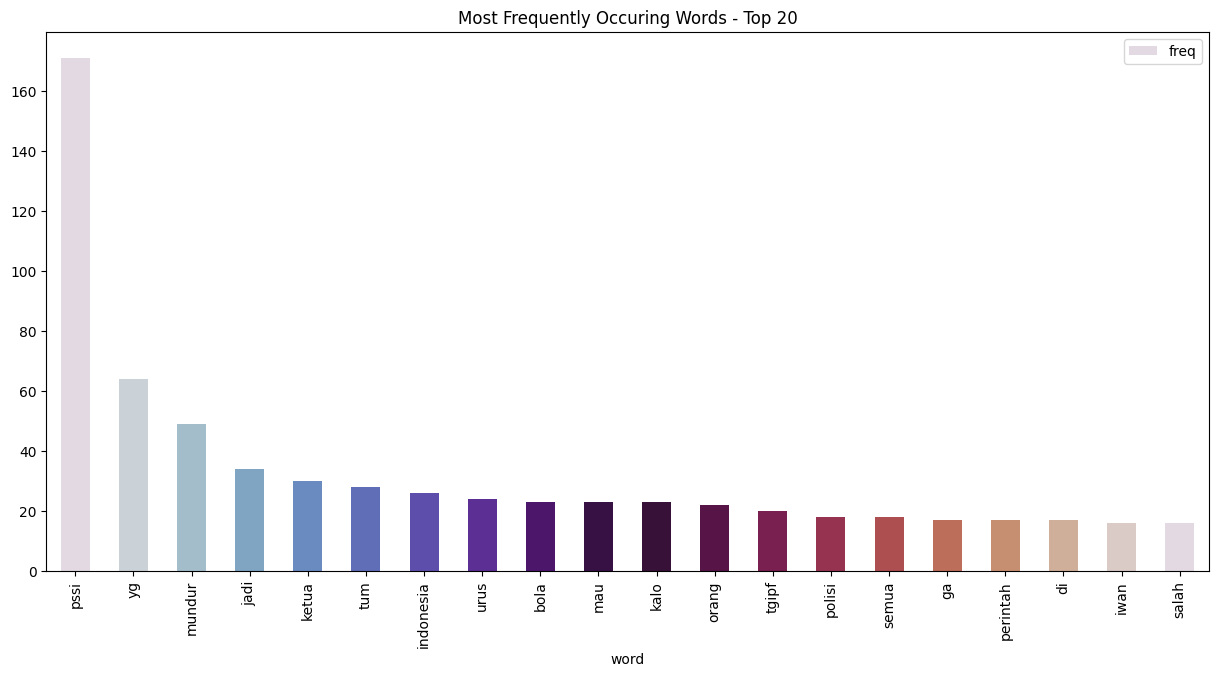

In [13]:
color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

<br><br>
<h1><b>4. Klastering</b> <i>(K-Means Clustering)</i></h1>
<ul>
    <li><b>K-Means Clustering</b> termasuk algoritma <b>unsupervised learning</b>, yang mana label/kelompok data belum ditentukan di awal.</li>
    <li>Data dikelompokkan berdasarkan kedekatan jarak terhadap <b>Centroid</b> (titik pusat) terdekatnya.</li>
    <li>Jarak data terhadap centroid dapat dihitung menggunakan <b>Euclidean Distance</b>.</li>
    <li>Setelah data dikelompokkan, <b>centroid</b> (titik pusat) akan diperbarui dan dikelompokkan kembali berdasarkan <b>centroid</b> yang baru. Iterasi ini terus dilakukan hingga pola yang didapat sama dengan pola sebelumnya.</li>
</ul>
<hr>

<h3><b>4.1. Import Library</b></h3>

In [14]:
from sklearn.cluster import KMeans

<br>
<h3><b>4.2. Listing Utama</b></h3>

<h5><b>4.2.1. Menentukan beberapa parameter yang digunakan dalam K-Means Clustering, seperti :</b></h5>
<ul>
    <li><b>n_cluster</b> : Jumlah kelompok/cluster yang ingin dibuat.</li>
    <li><b>n_init</b> : Berapa kali algoritma k-means akan dijalankan dengan seed centroid yang berbeda. Hasil akhir akan menjadi output terbaik dari n_init run berturut-turut dalam hal inersia.</li>
    <li><b>max_iter</b> : Batas maksimal iterasi.</li>
    <li><b>init</b> : Memilih metode untuk inisialisasi centroid awal.</li>
    <li><b>'k-means++'</b> : Memilih centroid cluster awal menggunakan pengambilan sampel berdasarkan distribusi probabilitas empiris dari kontribusi poin terhadap inersia keseluruhan.</li>
</ul>

In [15]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

<h5><b>4.2.2. Menampilkan 10 data dari tiap-tiap cluster.</b></h5>

In [16]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  
  for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind]),
  
  print()

Cluster 0:
 pssi
 yg
 mundur
 jadi
 tum
 indonesia
 ketua
 orang
 tgipf
 kalo

Cluster 1:
 pssi
 mundur
 urus
 ketua
 perintah
 yg
 umum
 kalo
 iwan
 mau

Cluster 2:
 bola
 main
 pake
 ubah
 sepak
 seluruh
 gamis
 kulit
 salah
 anis



<h5><b>4.2.3. Mencoba untuk memprediksi cluster kata berdasarkan model yang sudah dibuat.</b></h5>

In [17]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


<br><br>
<h1><b>5. Klastering</b> <i>(Hierarchical Clustering)</i></h1>
<ul>
    <li><b>Hierarchical Clustering</b> termasuk algoritma <b>unsupervised learning</b>, yang mana label/kelompok data belum ditentukan di awal.</li>
    <li>Data yang dibagi menjadi cluster-cluster kecil akan digabungkan berulang kali ke dalam beberapa cluster, sampai terbentuk 1 kluster utuh. Proses penggabungan ini akan membentuk suatu pohon hirarki.</li>
    <li>Hirarki ini dapat di-visualisasikan menggunakan <b>Dendrogram</b>.</li>
</ul>

<hr>

Secara umum, hierarchical clustering dibagi menjadi dua jenis yaitu agglomerative dan divisive.

<img src="./images/agglomerative-divisive.png" alt="Agglomerative & Divisive" style="width:400px;"/>

<ul>
    <li><b>Agglomerative</b> : memulai dari bawah ke atas (bottom up)</li>
    <li><b>Divisive</b> : memulai dari atas ke bawah (top down)</li>
</ul>

<hr>

Proses penggabungan (linkage) cluster-cluster kecil menjadi satu dendrogram utuh dilakukan melalui beberapa pendekatan <b>Linkage Method</b>. Berikut ini linkage method yang sering digunakan :

<img src="./images/linkage-methods.png" alt="Linkage Methods" style="width:600px;"/>

<ul>
    <li><b>Centroid Linkage</b> : Mengukur jarak antar centroid pada dua cluster. Perhitungan centroid disini menggunakan rata-rata pada suatu variabel x. Dendrogram yang terbentuk akan berdasarkan cluster dengan jarak antar centroid paling kecil.</li>
    <br>
    <li><b>Single/Minimum Linkage</b> : Mengukur terlebih dahulu jarak antar tiap observasi dari cluster yang berbeda (pairwise distances). Jarak paling kecil (minimum distance) akan menjadi ukuran (dis)similarity antar cluster. Dendrogram akan terbentuk dari cluster-cluster yang memiliki (dis)similarity paling kecil. Hal ini membuat dendrogram yang terbentuk menjadi lebih “loose” atau berdekatan antar clusternya.</li>
    <br>
    <li><b>Complete/Maximum Linkage</b> : Mengukur terlebih dahulu jarak antar tiap observasi dari cluster yang berbeda (pairwise distances). Jarak paling tinggi (maximum distance) akan menjadi ukuran (dis)similarity antar cluster. Kemudian, dendrogram akan terbentuk dari cluster-cluster yang memiliki (dis)similarity paling kecil. Hal ini membuat dendrogram yang terbentuk menjadi lebih terpisah antar clusternya (terbentuk cluster yang “compact”).</li>
    <br>
    <li><b>Average Linkage</b> : Mengukur terlebih dahulu jarak antar tiap observasi dari cluster yang berbeda (pairwise distances). Kemudian, dihitung rata-rata jarak dari pairwise distance tersebut dan nilai tersebut akan menjadi ukuran (dis)similarity antar cluster. Dendrogram akan terbentuk dari cluster-cluster yang memiliki (dis)similarity paling kecil. Umumnya metode ini akan menghasilkan cluster yang tidak terlalu “loose” maupun “compact”</li>
    <br>
    <li><b>Ward’s minimum Variance</b> : Pada metode ini, di tiap iterasinya akan dibentuk cluster-cluster yang kemudian dihitung nilai within sum of square tiap cluster (WSS). WSS dapat diartikan sebagai jumlah dari jarak tiap observasi ke nilai tengah cluster. Cluster-cluster yang menghasilkan within sum of square terkecil akan diambil kemudian digabungkan hingga membentuk satu dendrogram utuh.</li>
</ul>

<hr>

<br>
<h3><b>5.1. Import Library</b></h3>

In [18]:
import scipy.cluster.hierarchy as sch

<br>
<h3><b>5.2. Metode <i>Ward Linkage</i></b></h3>

<h5><b>5.2.1. Menggabungkan Cluster + Menampilkan Dendrogram dengan orientasi "Top" </b></h5>

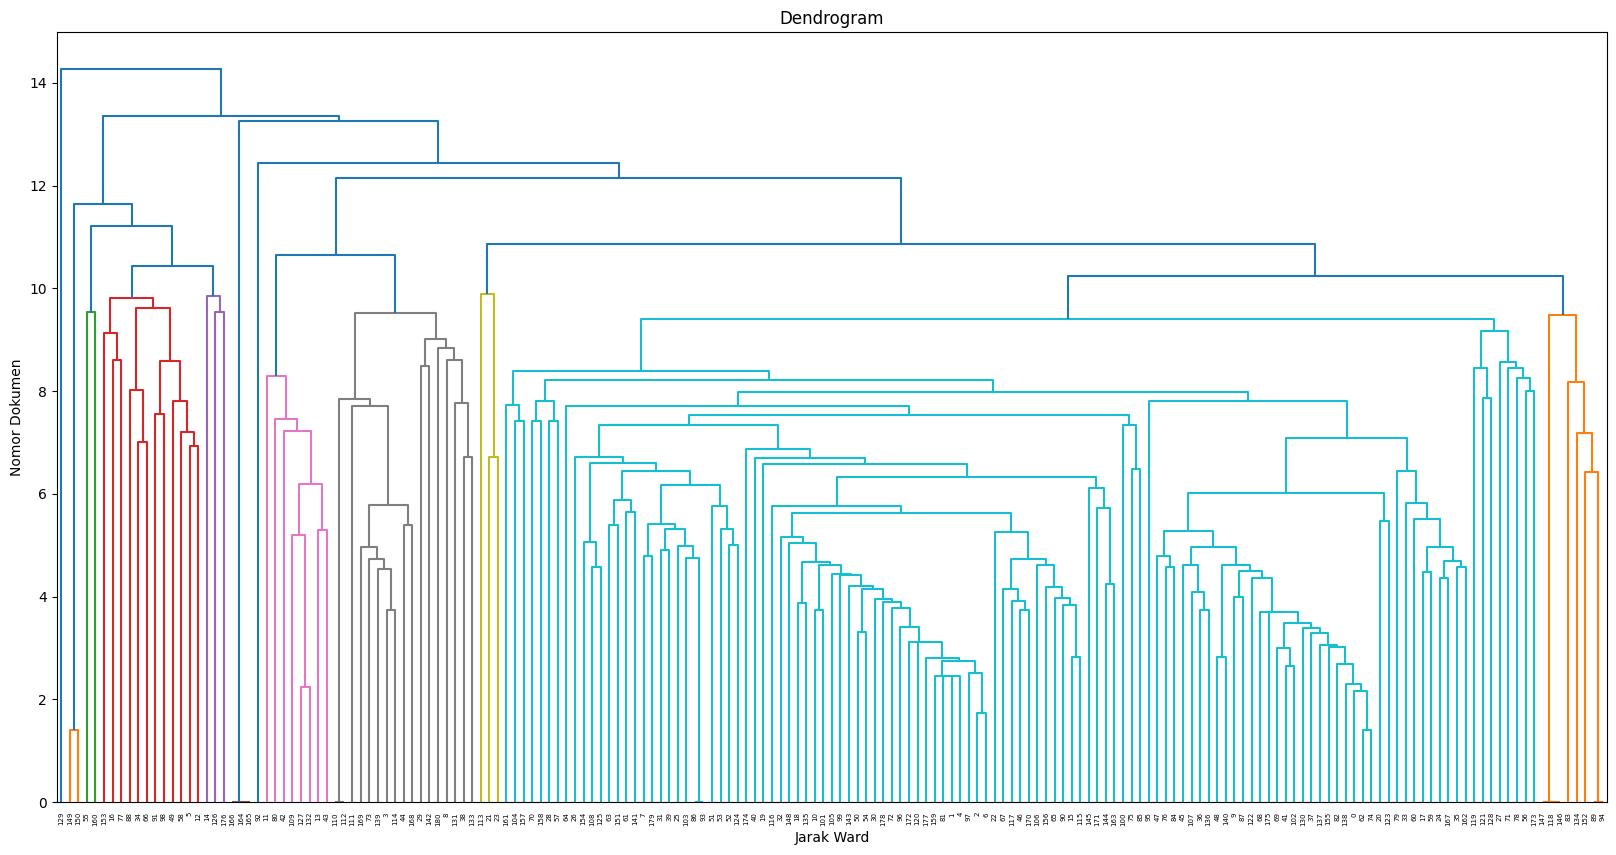

In [19]:
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

<h5><b>5.2.2. Proses HC (Agglomerative) + Prediksi Cluster-nya </b></h5>

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[2 2 2 5 2 0 2 2 5 2 2 5 0 5 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 0 2 2
 2 5 2 2 2 5 5 5 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 5
 2 2 2 0 2 2 5 2 2 2 2 2 2 2 0 2 2 0 4 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 5 5
 5 5 2 5 2 2 2 2 2 2 2 2 2 2 2 0 5 2 3 2 5 5 5 2 2 2 2 2 5 2 2 5 2 2 2 2 2
 2 0 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 1 1 2 5 5 2 2 2 2 2 2 0 2 2 2 5]


<br>
<h3><b>5.3. Metode <i>Average Linkage</i></b></h3>

<h5><b>5.3.1 Menggabungkan Cluster + Menampilkan Dendrogram dengan orientasi "Right" </b></h5>

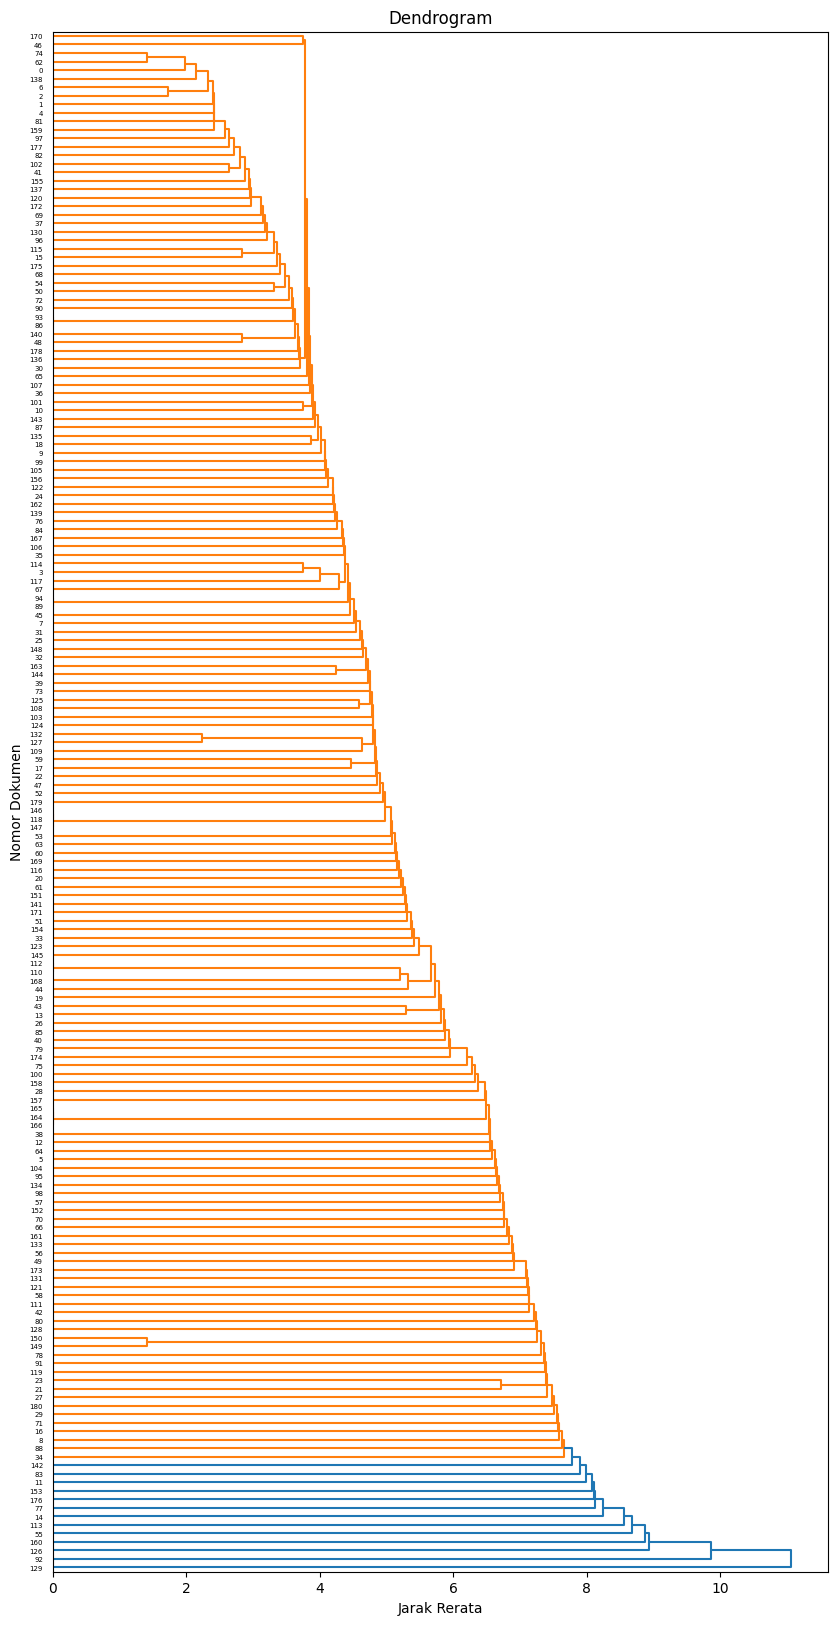

In [21]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(10, 20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

<h5><b>5.3.2. Menggabungkan Cluster + Menampilkan Dendrogram dengan orientasi "Top" </b></h5>

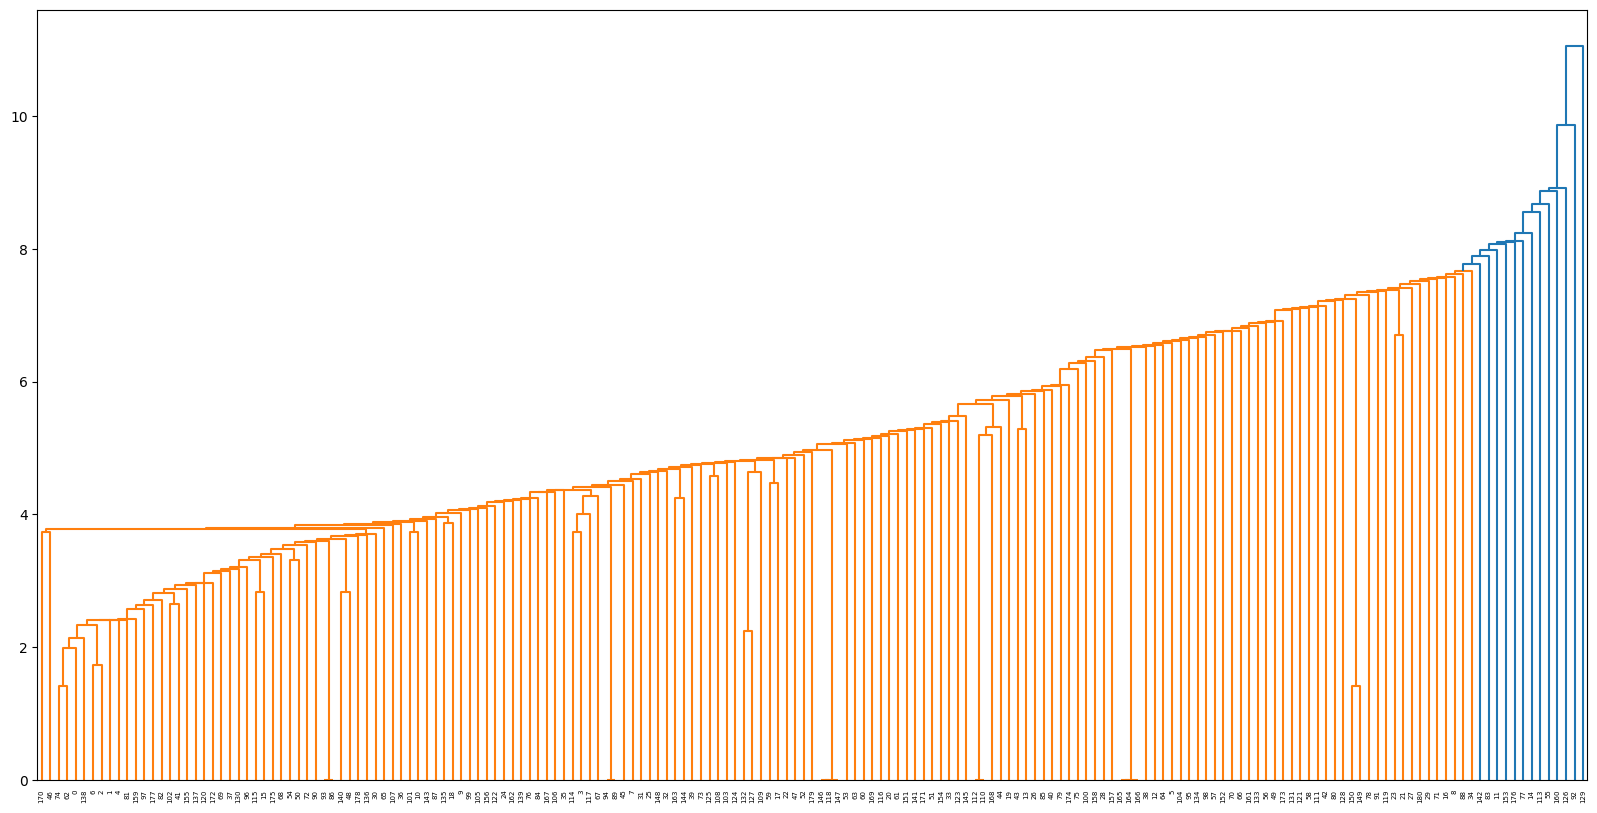

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

<h5><b>5.3.3. Proses HC (Agglomerative) + Prediksi Cluster-nya </b></h5>

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<br>
<h3><b>5.4. Metode <i>Single Linkage</i></b></h3>

<h5><b>5.4.1 Menggabungkan Cluster + Menampilkan Dendrogram dengan orientasi "Top" </b></h5>

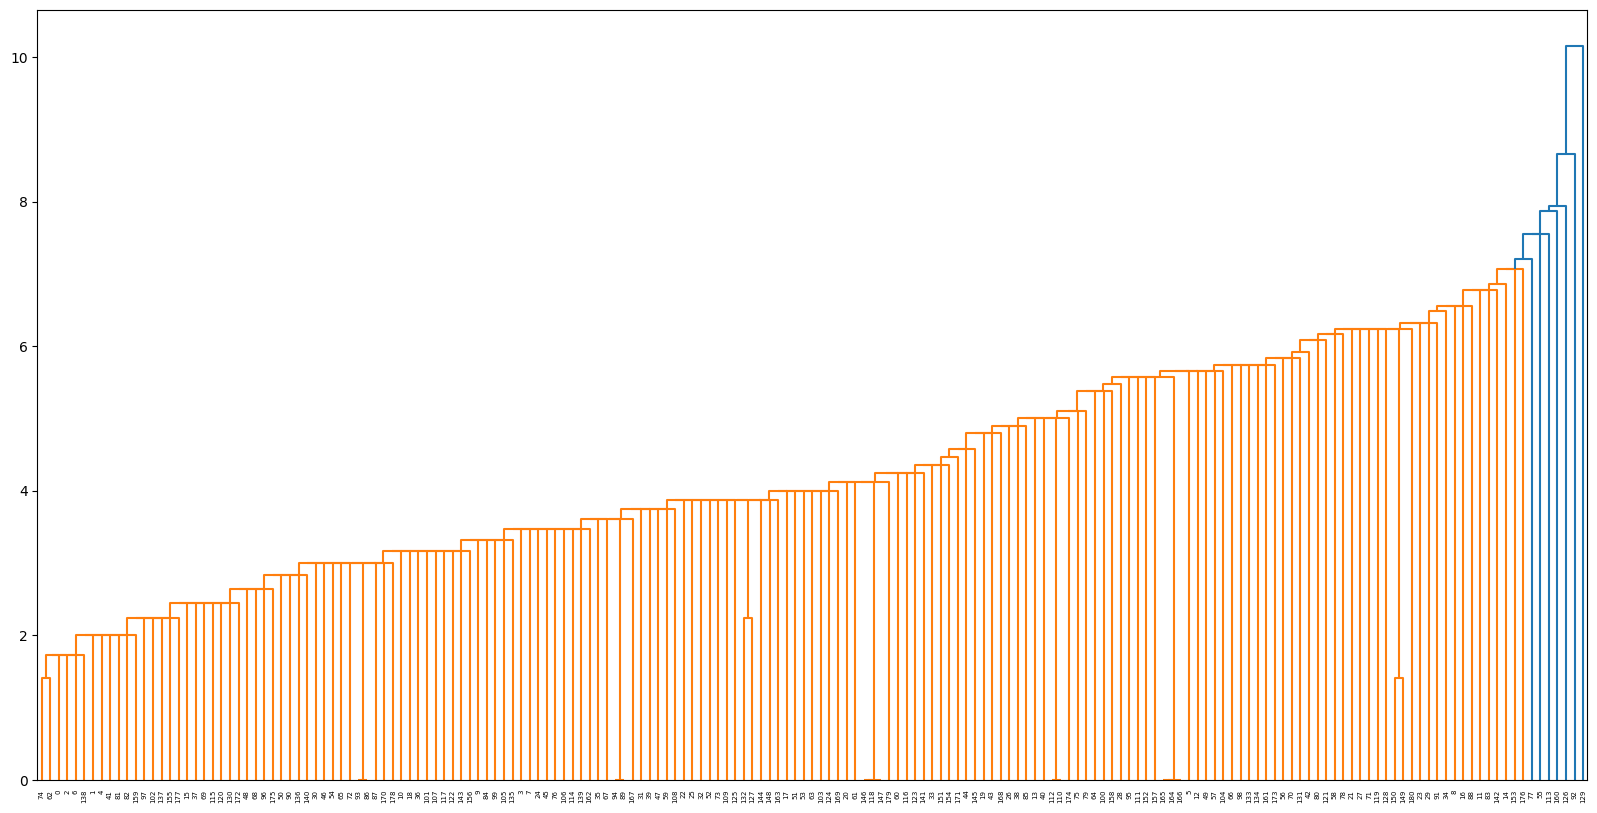

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

<h5><b>5.4.2. Proses HC (Agglomerative) + Prediksi Cluster-nya </b></h5>

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
